In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets
import pandas as pd
import time
import sys
from pathlib import Path

import src.my_mod as mm

import skimage.filters as flt
import json

In [2]:
im1 = np.array(Image.open('imgs/cameraman.tif'))
im2 = np.array(Image.open('imgs/sent.jpg'))
im3 = np.array(Image.open('imgs/pirate.tif'))
im4 = np.array(Image.open('imgs/lena_gray_512.tif'))
im5 = np.array(Image.open('imgs/woman_blonde.tif'))
im6 = np.array(Image.open('imgs/livingroom.tif'))

In [3]:
dir(flt)

['LPIFilter2D',
 'apply_hysteresis_threshold',
 'butterworth',
 'correlate_sparse',
 'difference_of_gaussians',
 'farid',
 'farid_h',
 'farid_v',
 'frangi',
 'gabor',
 'gabor_kernel',
 'gaussian',
 'hessian',
 'inverse',
 'laplace',
 'median',
 'meijering',
 'prewitt',
 'prewitt_h',
 'prewitt_v',
 'rank',
 'rank_order',
 'roberts',
 'roberts_neg_diag',
 'roberts_pos_diag',
 'sato',
 'scharr',
 'scharr_h',
 'scharr_v',
 'sobel',
 'sobel_h',
 'sobel_v',
 'threshold_isodata',
 'threshold_li',
 'threshold_local',
 'threshold_mean',
 'threshold_minimum',
 'threshold_multiotsu',
 'threshold_niblack',
 'threshold_otsu',
 'threshold_sauvola',
 'threshold_triangle',
 'threshold_yen',
 'try_all_threshold',
 'unsharp_mask',
 'wiener',
 'window']

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1080x504 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

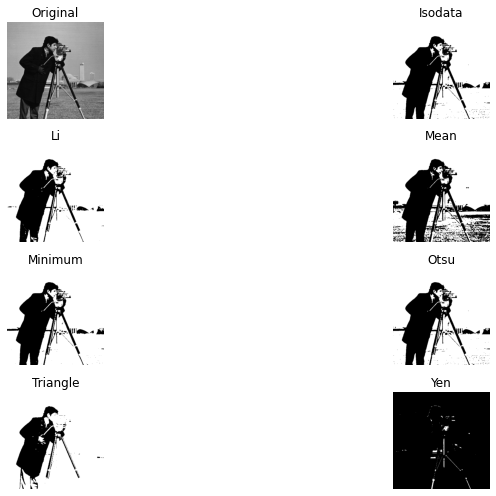

In [4]:
flt.try_all_threshold(im1, figsize=(15,7))

# Convolution

# Kernels

In [5]:
mn3x3 = np.ones((3,3), dtype=int)
mn3x3

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [6]:
mn3x3_1 = mn3x3.copy()
mn3x3_1[1,1] = 4
mn3x3_1

array([[1, 1, 1],
       [1, 4, 1],
       [1, 1, 1]])

In [7]:
mn3x3_2 = mn3x3.copy()
mn3x3_2[1,1] = 12
mn3x3_2

array([[ 1,  1,  1],
       [ 1, 12,  1],
       [ 1,  1,  1]])

In [8]:
mn5x5 = np.ones((5,5), dtype=int)

# Step by step

In [9]:
def kernel_multi(kernel, ar):
    ker = kernel.copy()
    window = ar.copy()
    kernel_sum = ker.sum()

    if kernel_sum == 0:
        kernel_sum = 1
    
    res = (kernel * window).sum() / kernel_sum
    return int(res)

In [10]:
window = im1[:3,:3]
kernel_multi(mn3x3, window)

157

## Padding

In [11]:
np.pad(window, 1, constant_values=1)

array([[  1,   1,   1,   1,   1],
       [  1, 156, 157, 160,   1],
       [  1, 156, 157, 159,   1],
       [  1, 158, 157, 156,   1],
       [  1,   1,   1,   1,   1]], dtype=uint8)

## For loop

In [12]:
pad = 1
im1_con = np.pad(im1, pad)
im1.shape, im1_con.shape

((512, 512), (514, 514))

In [13]:
out = im1.copy()

for row in range(1, im1_con.shape[0]-1):
    for col in range(1, im1_con.shape[1]-1):
        window = im1_con[row-1:row+2, col-1:col+2]
        new_pixel = kernel_multi(mn3x3, window)
        out[row-1, col-1] = new_pixel
        

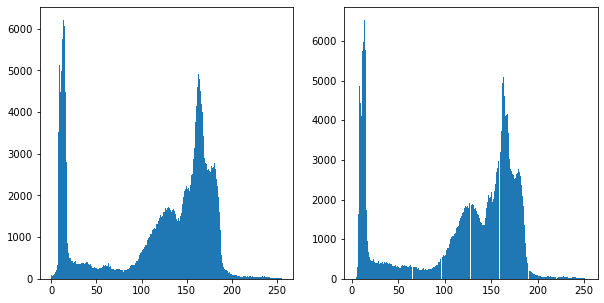

In [14]:
mm.img_show(im1, out, h=1)

In [15]:
def my_convolution(ar, kernel):
    out = ar.copy()
    #pad = kernel.shape[0]
    ar_con = np.pad(ar, pad)
    aux_row = kernel[0].shape[0]
    aux_col = kernel[1].shape[0]
    for row in range(pad, ar_con.shape[0]-aux_row):
        for col in range(1, ar_con.shape[1]-aux_col):
            window = ar_con[row-1:row+aux_row-1, col-1:col+aux_col-1]
            new_pixel = kernel_multi(kernel, window)
            out[row-1, col-1] = new_pixel
    return out

In [16]:
im1_conv = my_convolution(im1, mn5x5)

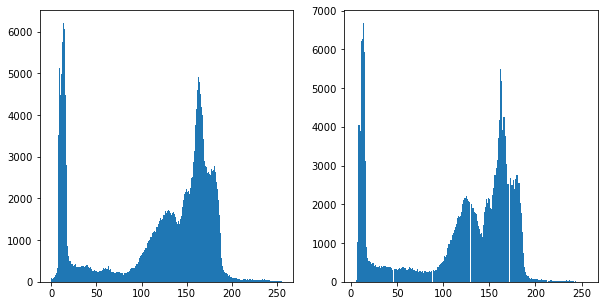

In [17]:
mm.img_show(im1, im1_conv, h=1)

# Kernels from json files

In [18]:
with open('kernels/kernel1.json') as f:
    set_kernels1 = json.load(f)


In [19]:
gaus4 = np.array(set_kernels1['gaus4'], dtype=int)
gaus4

array([[ 1,  1,  2,  2,  2,  1,  1],
       [ 1,  2,  2,  4,  2,  2,  1],
       [ 2,  2,  4,  8,  4,  2,  2],
       [ 2,  4,  8, 16,  8,  4,  2],
       [ 2,  2,  4,  8,  4,  2,  2],
       [ 1,  2,  2,  4,  2,  2,  1],
       [ 1,  1,  2,  2,  2,  1,  1]])

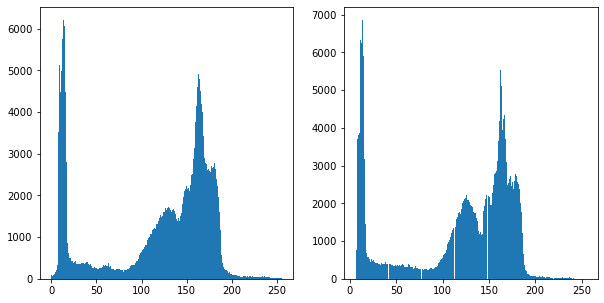

In [20]:
res_g4 = my_convolution(im1, gaus4)
mm.img_show(im1, res_g4, h=1)

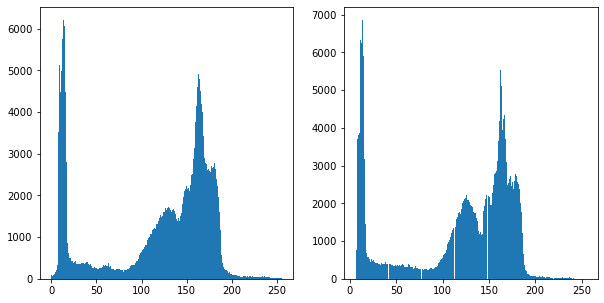

In [21]:
mm.img_show(im1, res_g4, h=1)

In [22]:
with open('kernels/kernel3.json') as f:
    set_kernels3 = json.load(f)

set_kernels3

{'horizontal': [[0, 0, 0], [-1, 1, 0], [0, 0, 0]],
 'diagonal': [[0, 0, -1], [0, 1, 0], [0, 0, 0]],
 'gradient1': [[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]],
 'gradient2': [[1, 1, 1], [1, -2, 1], [-1, -1, -1]],
 'laplace1': [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
 'laplace2': [[1, -2, 1], [-2, 4, -2], [1, -2, 1]],
 'sobel_vertical': [[1, 0, -1], [2, 0, -2], [1, 0, -1]],
 'prewit_vertical': [[1, 0, -1], [1, 0, -1], [1, 0, -1]]}

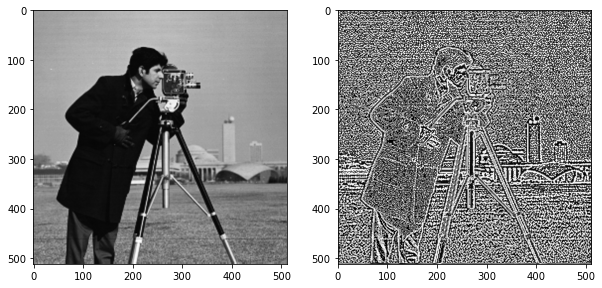

In [23]:
lap = np.array(set_kernels3['laplace1'])
res_lap = my_convolution(im1, lap)
mm.img_show(im1, res_lap)

# Exercice zebi

- create function to image_convolusion
- read filters from json files
- make comparaison between all filters


slope :


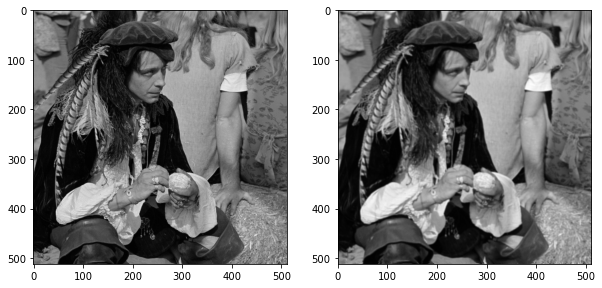

gaus1 :


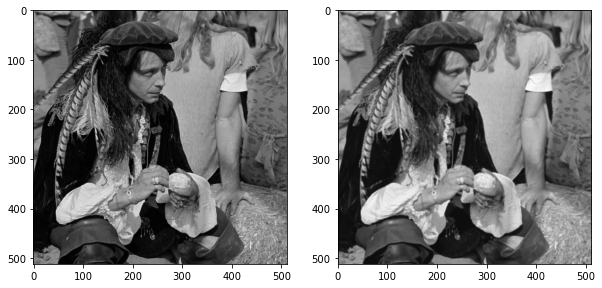

gaus2 :


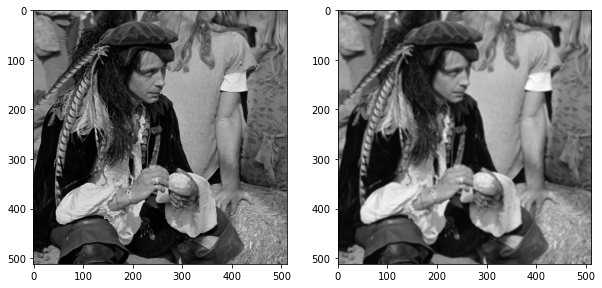

gaus3 :


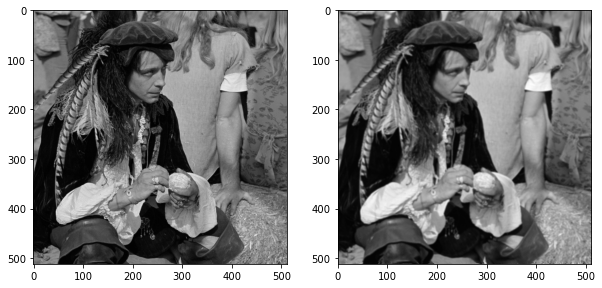

gaus4 :


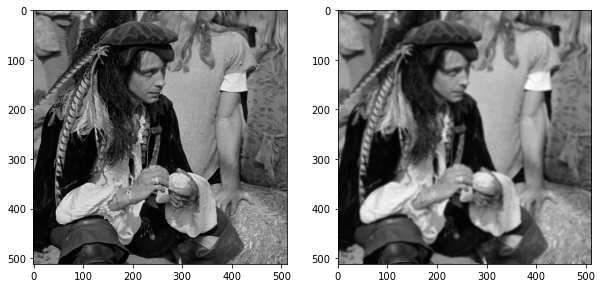

high1 :


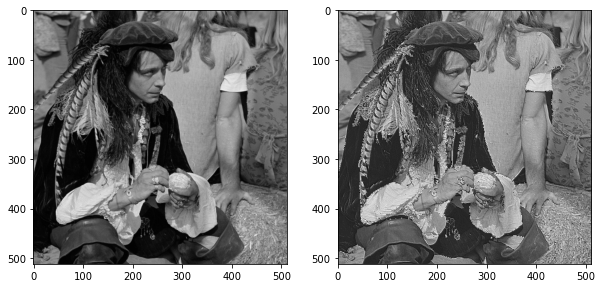

high2 :


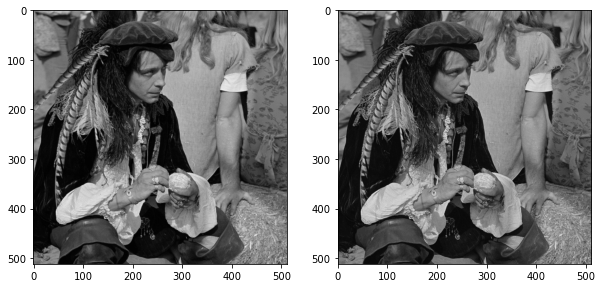

horizontal :


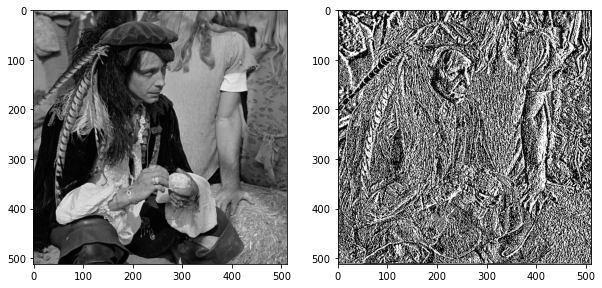

diagonal :


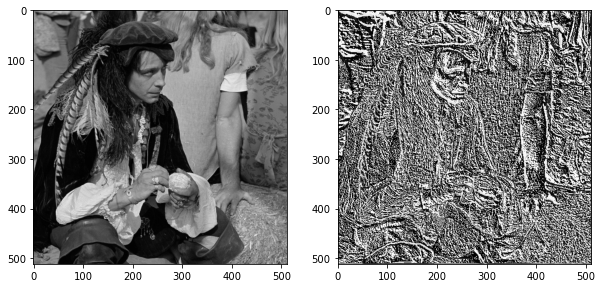

gradient1 :


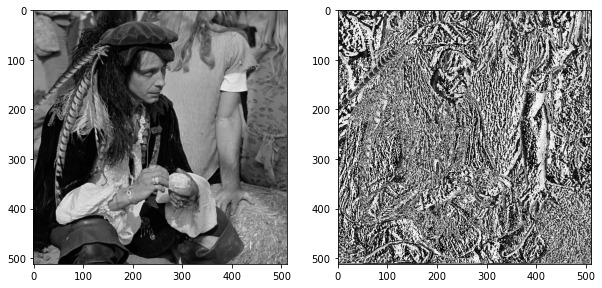

gradient2 :


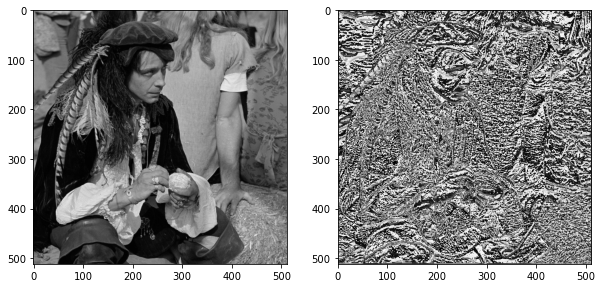

laplace1 :


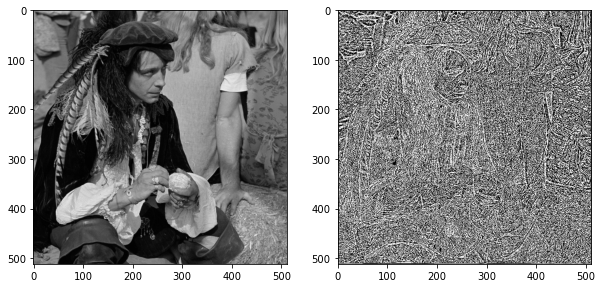

laplace2 :


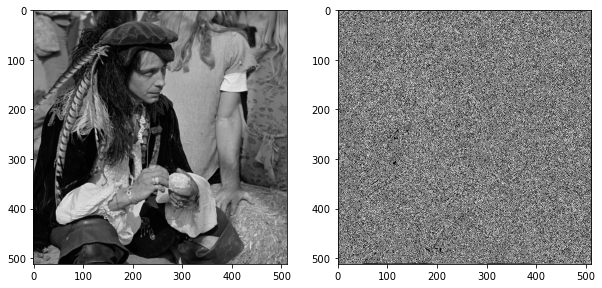

sobel_vertical :


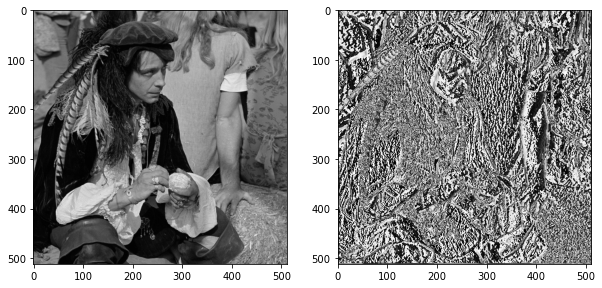

prewit_vertical :


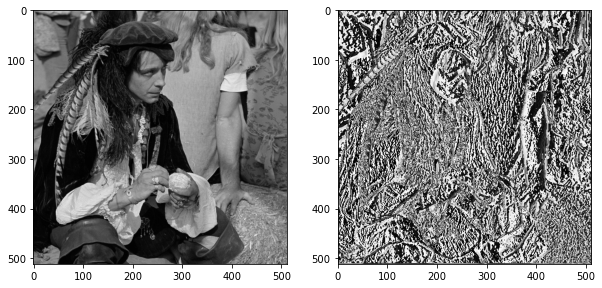

In [27]:
path = 'kernels'
directory = Path(path).glob('*')
for file in directory:
    with open(file) as f:
        json_file = json.load(f)
        for name, kernels in json_file.items():
            im_converted = my_convolution(im3, np.array(kernels, dtype=int))
            print(f'{name} :')
            mm.img_show(im3, im_converted)
            plt.show()